In [1]:
import pandas as pd
from datasets import Dataset


/opt/conda/envs/lob001/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH_TO_LOBSTER = "/workspaces/2025 LoBERT/data/LOBSTER_SampleFile_AAPL_2012-06-21_10/"
filename_orderbook = "AAPL_2012-06-21_34200000_57600000_orderbook_10.csv"
filename_messages = "AAPL_2012-06-21_34200000_57600000_message_10.csv"

In [3]:
orderbook = pd.read_csv(PATH_TO_LOBSTER + filename_orderbook, header=None)
messages = pd.read_csv(PATH_TO_LOBSTER + filename_messages, header=None)
print(f"Orderbook shape: {orderbook.shape}")
print(f"Messages shape: {messages.shape}")

Orderbook shape: (400391, 40)
Messages shape: (400391, 6)


In [4]:
number_of_levels = orderbook.shape[1] // 4
level_col_names = [col_name for i in range(1, number_of_levels + 1) for col_name in [f"Ask_Price_{i}", f"Ask_Size_{i}", f"Bid_Price_{i}", f"Bid_Size_{i}"]]
orderbook.columns = level_col_names

In [5]:
orderbook

,Ask_Price_1,Ask_Size_1,Bid_Price_1,Bid_Size_1,Ask_Price_2,Ask_Size_2,Bid_Price_2,Bid_Size_2,Ask_Price_3,Ask_Size_3,...,Bid_Price_8,Bid_Size_8,Ask_Price_9,Ask_Size_9,Bid_Price_9,Bid_Size_9,Ask_Price_10,Ask_Size_10,Bid_Price_10,Bid_Size_10
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5845300,300,5876500,1160,5843800,200,5879000,500,5842700,300
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5846500,300,5876500,1160,5845300,300,5879000,500,5843800,200
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5849300,300,5876500,1160,5846500,300,5879000,500,5845300,300
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5849300,300,5873900,100,5846500,300,5876500,1160,5845300,300
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5849300,300,5871000,10,5846500,300,5873900,100,5845300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400386,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777600,100,5774500,200,5777700,100,5774300,100
400387,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777500,600,5774500,200,5777600,100,5774300,100
400388,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777500,600,5774500,200,5777600,100,5774300,100
400389,5776700,300,5775400,410,5776800,200,5775300,1400,5776900,160,...,5774600,100,5777600,100,5774500,200,5777800,200,5774300,100


In [6]:
message_col_names = [
    "Time", "Type", "OrderID", "Size", "Price", "Direction"
]
messages.columns = message_col_names

In [7]:
# Time is in Seconds after midnight with decimal precision of at least milliseconds and up to nanoseconds depending on the requested period
# Convert it to datetime
messages["Time"] = pd.to_datetime(messages["Time"], unit="s", origin="2012-06-21 00:00:00")

In [8]:
messages

,Time,Type,OrderID,Size,Price,Direction
0,2012-06-21 09:30:00.004241228,1,16113575,18,5853300,1
1,2012-06-21 09:30:00.004260540,1,16113584,18,5853200,1
2,2012-06-21 09:30:00.004447460,1,16113594,18,5853100,1
3,2012-06-21 09:30:00.025551796,1,16120456,18,5859100,-1
4,2012-06-21 09:30:00.025579453,1,16120480,18,5859200,-1
...,...,...,...,...,...,...
400386,2012-06-21 15:59:59.444019556,1,287150868,48,5776100,-1
400387,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1
400388,2012-06-21 15:59:59.625827074,3,286898608,100,5774900,1
400389,2012-06-21 15:59:59.913117647,4,287150868,48,5776100,-1


In [9]:
messages.Type.value_counts()

Type
1    191015
3    171126
4     23658
5     11332
2      3260
Name: count, dtype: int64

In [10]:
messages = messages[messages.Type != 5]
orderbook = orderbook.reindex(messages.index)
print(f"Orderbook shape: {orderbook.shape}")
print(f"Messages shape: {messages.shape}")

Orderbook shape: (389059, 40)
Messages shape: (389059, 6)


In [11]:
messages.Type.value_counts()

Type
1    191015
3    171126
4     23658
2      3260
Name: count, dtype: int64

In [12]:
def get_state(orderbook, index):
    return orderbook.loc[index]

def pretty_state(state: pd.Series):

    # Create a DataFrame for Ask and Bid
    ask_df = pd.DataFrame({
        'Direction': 'Ask',
        'Price': state.filter(like='Ask_Price').values,
        'Size': state.filter(like='Ask_Size').values
    })

    bid_df = pd.DataFrame({
        'Direction': 'Bid',
        'Price': state.filter(like='Bid_Price').values,
        'Size': state.filter(like='Bid_Size').values
    })

    # Combine both DataFrames
    result_df = pd.concat([ask_df, bid_df], ignore_index=True)

    # Display the result
    return result_df.sort_values("Price", ascending=False)

In [13]:
pretty_state_1 = pretty_state(get_state(orderbook, 0))
pretty_state_1

,Direction,Price,Size
9,Ask,5879000,500
8,Ask,5876500,1160
7,Ask,5873900,100
6,Ask,5871000,10
5,Ask,5870000,100
4,Ask,5869500,50
3,Ask,5868900,300
2,Ask,5861000,200
1,Ask,5859800,200
0,Ask,5859400,200


In [14]:
pretty_state_2 = pretty_state(get_state(orderbook, 1))
pretty_state_2

,Direction,Price,Size
9,Ask,5879000,500
8,Ask,5876500,1160
7,Ask,5873900,100
6,Ask,5871000,10
5,Ask,5870000,100
4,Ask,5869500,50
3,Ask,5868900,300
2,Ask,5861000,200
1,Ask,5859800,200
0,Ask,5859400,200


In [15]:
pretty_state_1.merge(pretty_state_2, on="Price", suffixes=("_t", "_t+1"), how="outer").sort_values("Price", ascending=False)

,Direction_t,Price,Size_t,Direction_t+1,Size_t+1
20,Ask,5879000,500.0,Ask,500.0
19,Ask,5876500,1160.0,Ask,1160.0
18,Ask,5873900,100.0,Ask,100.0
17,Ask,5871000,10.0,Ask,10.0
16,Ask,5870000,100.0,Ask,100.0
15,Ask,5869500,50.0,Ask,50.0
14,Ask,5868900,300.0,Ask,300.0
13,Ask,5861000,200.0,Ask,200.0
12,Ask,5859800,200.0,Ask,200.0
11,Ask,5859400,200.0,Ask,200.0


In [16]:
messages.loc[0]

Time         2012-06-21 09:30:00.004241228
Type                                     1
OrderID                           16113575
Size                                    18
Price                              5853300
Direction                                1
Name: 0, dtype: object

In [17]:
messages['delta_time'] = messages.Time.diff()

/tmp/ipykernel_25363/2680009254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['delta_time'] = messages.Time.diff()


In [18]:
messages

,Time,Type,OrderID,Size,Price,Direction,delta_time
0,2012-06-21 09:30:00.004241228,1,16113575,18,5853300,1,NaT
1,2012-06-21 09:30:00.004260540,1,16113584,18,5853200,1,0 days 00:00:00.000019312
2,2012-06-21 09:30:00.004447460,1,16113594,18,5853100,1,0 days 00:00:00.000186920
3,2012-06-21 09:30:00.025551796,1,16120456,18,5859100,-1,0 days 00:00:00.021104336
4,2012-06-21 09:30:00.025579453,1,16120480,18,5859200,-1,0 days 00:00:00.000027657
...,...,...,...,...,...,...,...
400385,2012-06-21 15:59:59.444019556,4,287147170,11,5776000,1,0 days 00:00:00
400386,2012-06-21 15:59:59.444019556,1,287150868,48,5776100,-1,0 days 00:00:00
400387,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1,0 days 00:00:00.000775337
400388,2012-06-21 15:59:59.625827074,3,286898608,100,5774900,1,0 days 00:00:00.181032181


In [19]:
tick_size = 100
mid_price = (orderbook.Ask_Price_1 + orderbook.Bid_Price_1)/2
price_ref = ((mid_price // tick_size) * tick_size).astype(int)
price_ref

0         5856300
1         5856300
2         5856300
3         5856200
4         5856200
           ...   
400385    5776000
400386    5775700
400387    5775700
400388    5775700
400389    5776000
Length: 389059, dtype: int64

In [20]:
messages['Relative_Price'] = (messages.Price - price_ref) / tick_size
messages

/tmp/ipykernel_25363/3327321403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['Relative_Price'] = (messages.Price - price_ref) / tick_size


,Time,Type,OrderID,Size,Price,Direction,delta_time,Relative_Price
0,2012-06-21 09:30:00.004241228,1,16113575,18,5853300,1,NaT,-30.0
1,2012-06-21 09:30:00.004260540,1,16113584,18,5853200,1,0 days 00:00:00.000019312,-31.0
2,2012-06-21 09:30:00.004447460,1,16113594,18,5853100,1,0 days 00:00:00.000186920,-32.0
3,2012-06-21 09:30:00.025551796,1,16120456,18,5859100,-1,0 days 00:00:00.021104336,29.0
4,2012-06-21 09:30:00.025579453,1,16120480,18,5859200,-1,0 days 00:00:00.000027657,30.0
...,...,...,...,...,...,...,...,...
400385,2012-06-21 15:59:59.444019556,4,287147170,11,5776000,1,0 days 00:00:00,0.0
400386,2012-06-21 15:59:59.444019556,1,287150868,48,5776100,-1,0 days 00:00:00,4.0
400387,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1,0 days 00:00:00.000775337,15.0
400388,2012-06-21 15:59:59.625827074,3,286898608,100,5774900,1,0 days 00:00:00.181032181,-8.0


<Axes: xlabel='Relative_Price'>

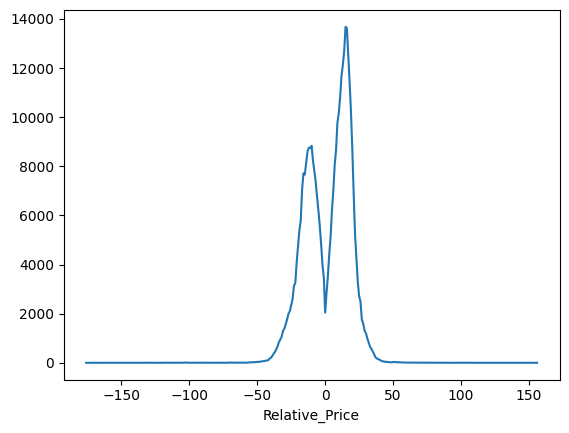

In [21]:
messages.Relative_Price.value_counts().sort_index().plot()

In [22]:
pd.crosstab(messages.Relative_Price>0, messages.Direction)

Direction,-1,1
Relative_Price,,
False,1774,168097
True,217798,1390


In [23]:
type = [1, 2, 3, 4]
direction = [-1, 1]
relative_price = list(range(-200, 200))
tokens_values = pd.MultiIndex.from_product([type, direction, relative_price], names=["Type", "Direction", "Relative_Price"])

In [24]:
n_reserved_tokens = 2
token_ids = range(
    n_reserved_tokens,
    tokens_values.shape[0] + n_reserved_tokens
    )

vocab = pd.Series(token_ids, index=tokens_values, name="TokenID")
vocab

Type  Direction  Relative_Price
1     -1         -200                 2
                 -199                 3
                 -198                 4
                 -197                 5
                 -196                 6
                                   ... 
4      1          195              3197
                  196              3198
                  197              3199
                  198              3200
                  199              3201
Name: TokenID, Length: 3200, dtype: int64

In [25]:
from tqdm import tqdm
def tokenize(x: pd.Series):
    return vocab[x.Type, x.Direction, x.Relative_Price]
tqdm.pandas(desc="Tokenizing messages")
messages['message_token'] = messages.progress_apply(tokenize, axis=1)

Tokenizing messages: 100%|██████████| 389059/389059 [00:35<00:00, 10818.71it/s]
/tmp/ipykernel_25363/1487712425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['message_token'] = messages.progress_apply(tokenize, axis=1)


In [26]:
# Let's remove the first row, with NaN delta_time
messages = messages.iloc[1:]
messages

,Time,Type,OrderID,Size,Price,Direction,delta_time,Relative_Price,message_token
1,2012-06-21 09:30:00.004260540,1,16113584,18,5853200,1,0 days 00:00:00.000019312,-31.0,571
2,2012-06-21 09:30:00.004447460,1,16113594,18,5853100,1,0 days 00:00:00.000186920,-32.0,570
3,2012-06-21 09:30:00.025551796,1,16120456,18,5859100,-1,0 days 00:00:00.021104336,29.0,231
4,2012-06-21 09:30:00.025579453,1,16120480,18,5859200,-1,0 days 00:00:00.000027657,30.0,232
5,2012-06-21 09:30:00.025613070,1,16120503,18,5859300,-1,0 days 00:00:00.000033617,31.0,233
...,...,...,...,...,...,...,...,...,...
400385,2012-06-21 15:59:59.444019556,4,287147170,11,5776000,1,0 days 00:00:00,0.0,3002
400386,2012-06-21 15:59:59.444019556,1,287150868,48,5776100,-1,0 days 00:00:00,4.0,206
400387,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1,0 days 00:00:00.000775337,15.0,217
400388,2012-06-21 15:59:59.625827074,3,286898608,100,5774900,1,0 days 00:00:00.181032181,-8.0,2194


In [27]:
messages['delta_time'] = messages.delta_time.dt.total_seconds()*1e6

/tmp/ipykernel_25363/2526188696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['delta_time'] = messages.delta_time.dt.total_seconds()*1e6


In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389058 entries, 1 to 400389
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Time            389058 non-null  datetime64[ns]
 1   Type            389058 non-null  int64         
 2   OrderID         389058 non-null  int64         
 3   Size            389058 non-null  int64         
 4   Price           389058 non-null  int64         
 5   Direction       389058 non-null  int64         
 6   delta_time      389058 non-null  float64       
 7   Relative_Price  389058 non-null  float64       
 8   message_token   389058 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 29.7 MB


<Axes: xlabel='message_token'>

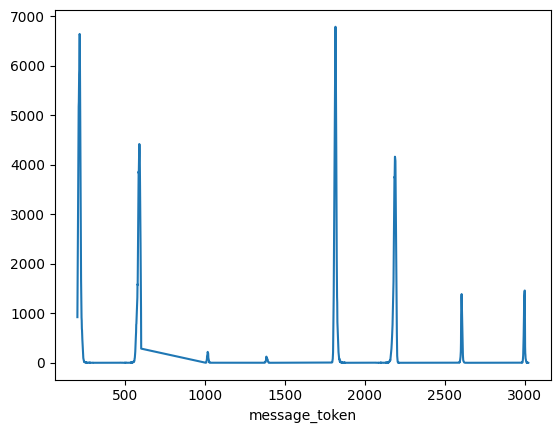

In [29]:
messages.message_token.value_counts().sort_index().plot()

In [30]:
messages

,Time,Type,OrderID,Size,Price,Direction,delta_time,Relative_Price,message_token
1,2012-06-21 09:30:00.004260540,1,16113584,18,5853200,1,19.312,-31.0,571
2,2012-06-21 09:30:00.004447460,1,16113594,18,5853100,1,186.920,-32.0,570
3,2012-06-21 09:30:00.025551796,1,16120456,18,5859100,-1,21104.336,29.0,231
4,2012-06-21 09:30:00.025579453,1,16120480,18,5859200,-1,27.657,30.0,232
5,2012-06-21 09:30:00.025613070,1,16120503,18,5859300,-1,33.617,31.0,233
...,...,...,...,...,...,...,...,...,...
400385,2012-06-21 15:59:59.444019556,4,287147170,11,5776000,1,0.000,0.0,3002
400386,2012-06-21 15:59:59.444019556,1,287150868,48,5776100,-1,0.000,4.0,206
400387,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1,775.337,15.0,217
400388,2012-06-21 15:59:59.625827074,3,286898608,100,5774900,1,181032.181,-8.0,2194


In [31]:
N = messages.shape[0]
context_length = 128

In [32]:
observations = []
for i in range(0, N, context_length):
    obs = [(int(x.message_token), x.delta_time, x.Size) for x in messages.iloc[i:i+context_length].itertuples()]
    obs_dict = dict(zip(['input_ids', 'time_ids', 'volume_ids'], zip(*obs)))
    observations.append(obs_dict)


In [33]:
ds = Dataset.from_list(observations)

In [34]:
path_arrow = "/workspaces/2025 LoBERT/data/LOBSTER_SampleFile_AAPL_2012-06-21_10/ArrowDataset"
ds.save_to_disk(path_arrow)

Saving the dataset (0/1 shards):   0%|          | 0/3040 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 3040/3040 [00:00<00:00, 10559.71 examples/s]


In [35]:
ds_2 = Dataset.load_from_disk(path_arrow)

In [36]:
ds_2

Dataset({
    features: ['input_ids', 'time_ids', 'volume_ids'],
    num_rows: 3040
})

In [37]:
ds_2[0]

{'input_ids': [571,
  570,
  231,
  232,
  233,
  540,
  233,
  2171,
  2172,
  1831,
  1833,
  1831,
  538,
  574,
  573,
  592,
  203,
  599,
  204,
  598,
  204,
  594,
  204,
  593,
  204,
  589,
  207,
  207,
  209,
  211,
  212,
  2165,
  2162,
  2164,
  2602,
  2603,
  3001,
  3001,
  2603,
  2603,
  2603,
  2602,
  2605,
  2604,
  2605,
  2606,
  2602,
  2612,
  544,
  593,
  1908,
  1958,
  594,
  593,
  592,
  587,
  210,
  2610,
  211,
  2191,
  2193,
  2192,
  216,
  215,
  2996,
  2994,
  2991,
  213,
  2191,
  566,
  321,
  321,
  2166,
  254,
  1814,
  1813,
  565,
  566,
  211,
  568,
  2994,
  2169,
  594,
  2194,
  569,
  594,
  594,
  2168,
  583,
  2183,
  584,
  596,
  211,
  2152,
  2192,
  2193,
  2183,
  2998,
  566,
  2994,
  2995,
  592,
  2168,
  572,
  2172,
  580,
  2180,
  582,
  593,
  2180,
  575,
  583,
  222,
  579,
  223,
  574,
  224,
  574,
  224,
  574,
  224,
  224,
  224,
  224,
  224,
  224,
  224,
  224],
 'time_ids': [19.312,
  186.92000000000